# Import required Libraries

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import nltk
from nltk.tokenize import word_tokenize


In [3]:
df = pd.read_csv(r"C:\Users\91970\AppData\Roaming\Microsoft\Windows\Network Shortcuts\b.csv")
df.head()

,Unnamed: 0,book_id,cover_image_uri,book_title,book_details,format,publication_info,authorlink,author,num_pages,genres,num_ratings,num_reviews,average_rating,rating_distribution
0,0,1,https://images-na.ssl-images-amazon.com/images...,Harry Potter and the Half-Blood Prince,"It is the middle of the summer, but there is a...","['652 pages, Paperback']","['First published July 16, 2005']",https://www.goodreads.com/author/show/1077326....,J.K. Rowling,['652'],"['Fantasy', 'Young Adult', 'Fiction', 'Magic',...",3292516,58398,4.58,"{'5': '2,244,154', '4': '775,028', '3': '219,8..."
1,1,2,https://images-na.ssl-images-amazon.com/images...,Harry Potter and the Order of the Phoenix,Harry Potter is about to start his fifth year ...,"['912 pages, Paperback']","['First published June 21, 2003']",https://www.goodreads.com/author/show/1077326....,J.K. Rowling,['912'],"['Young Adult', 'Fiction', 'Magic', 'Childrens...",3401709,64300,4.50,"{'5': '2,178,760', '4': '856,178', '3': '293,2..."
2,2,3,https://images-na.ssl-images-amazon.com/images...,Harry Potter and the Sorcerer's Stone,Harry Potter has no idea how famous he is. Tha...,"['309 pages, Hardcover']","['First published June 26, 1997']",https://www.goodreads.com/author/show/1077326....,J.K. Rowling,['309'],"['Fantasy', 'Fiction', 'Young Adult', 'Magic',...",10116247,163493,4.47,"{'5': '6,544,542', '4': '2,348,390', '3': '856..."
3,3,5,https://images-na.ssl-images-amazon.com/images...,Harry Potter and the Prisoner of Azkaban,"Harry Potter, along with his best friends, Ron...","['435 pages, Mass Market Paperback']","['First published July 8, 1999']",https://www.goodreads.com/author/show/1077326....,J.K. Rowling,['435'],"['Fantasy', 'Fiction', 'Young Adult', 'Magic',...",4215031,84959,4.58,"{'5': '2,892,322', '4': '970,190', '3': '287,7..."
4,4,6,https://images-na.ssl-images-amazon.com/images...,Harry Potter and the Goblet of Fire,It is the summer holidays and soon Harry Potte...,"['734 pages, Paperback']","['First published July 8, 2000']",https://www.goodreads.com/author/show/1077326....,J.K. Rowling,['734'],"['Fantasy', 'Young Adult', 'Fiction', 'Magic',...",3718209,69961,4.57,"{'5': '2,500,070', '4': '899,496', '3': '259,7..."


# Removing Extra/Unnecessary Columns

In [4]:
cols =[0,1,2, 7,14]
df1 = df.drop(df.columns[cols], axis = 1)

In [5]:
df1

,book_title,book_details,format,publication_info,author,num_pages,genres,num_ratings,num_reviews,average_rating
0,Harry Potter and the Half-Blood Prince,"It is the middle of the summer, but there is a...","['652 pages, Paperback']","['First published July 16, 2005']",J.K. Rowling,['652'],"['Fantasy', 'Young Adult', 'Fiction', 'Magic',...",3292516,58398,4.58
1,Harry Potter and the Order of the Phoenix,Harry Potter is about to start his fifth year ...,"['912 pages, Paperback']","['First published June 21, 2003']",J.K. Rowling,['912'],"['Young Adult', 'Fiction', 'Magic', 'Childrens...",3401709,64300,4.50
2,Harry Potter and the Sorcerer's Stone,Harry Potter has no idea how famous he is. Tha...,"['309 pages, Hardcover']","['First published June 26, 1997']",J.K. Rowling,['309'],"['Fantasy', 'Fiction', 'Young Adult', 'Magic',...",10116247,163493,4.47
3,Harry Potter and the Prisoner of Azkaban,"Harry Potter, along with his best friends, Ron...","['435 pages, Mass Market Paperback']","['First published July 8, 1999']",J.K. Rowling,['435'],"['Fantasy', 'Fiction', 'Young Adult', 'Magic',...",4215031,84959,4.58
4,Harry Potter and the Goblet of Fire,It is the summer holidays and soon Harry Potte...,"['734 pages, Paperback']","['First published July 8, 2000']",J.K. Rowling,['734'],"['Fantasy', 'Young Adult', 'Fiction', 'Magic',...",3718209,69961,4.57
...,...,...,...,...,...,...,...,...,...,...
16220,Finistère,The 1920s. When wealthy American adolescent Ma...,"['316 pages, Paperback']","['First published January 1, 1951']",Fritz Peters,['316'],"['Fiction', 'LGBT', 'Queer', 'Classics', 'Gay'...",129,22,3.77
16221,The Descent,"Set in the 1950s, The Descent asks the questio...","['268 pages, Paperback']","['First published January 1, 1952']",Fritz Peters,['268'],['Fiction'],4,0,4.75
16222,FDR Unmasked: 73 Years of Medical Cover-ups Th...,THE HIDDEN ILLNESSES THAT SHAPED FDR’S LIFE AN...,"['316 pages, Paperback']","['Published February 27, 2024']",Steven Lomazow,['316'],"['Drama', 'Novels', 'Contemporary']",986,11,4.32
16223,Code Yellow in Gretna Green,"In Gateway terminology, a ""Code Yellow"" signif...","['776 pages, Kindle Edition']","['Published March 28, 2024']",Linzi Day,['776'],"['Science Fiction Fantasy', 'Fantasy', 'Fictio...",1109,106,4.61


# Getting info about tdatatypes of each column & Memory

In [63]:
df1.columns

Index(['book_title', 'book_details', 'format', 'publication_info', 'author',
       'num_pages', 'genres', 'num_ratings', 'num_reviews', 'average_rating'],
      dtype='object')

In [64]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16225 entries, 0 to 16224
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   book_title        16225 non-null  object 
 1   book_details      16177 non-null  object 
 2   format            16225 non-null  object 
 3   publication_info  16225 non-null  object 
 4   author            16225 non-null  object 
 5   num_pages         16225 non-null  object 
 6   genres            16225 non-null  object 
 7   num_ratings       16225 non-null  int64  
 8   num_reviews       16225 non-null  int64  
 9   average_rating    16225 non-null  float64
dtypes: float64(1), int64(2), object(7)
memory usage: 1.2+ MB


In [55]:
df1.shape

(16225, 11)

# Checking Missisng Values

In [56]:
df1.isnull().sum()

book_title           0
book_details        48
format               0
publication_info     0
author               0
num_pages            0
genres               0
num_ratings          0
num_reviews          0
average_rating       0
my_rating            0
dtype: int64

<Axes: >

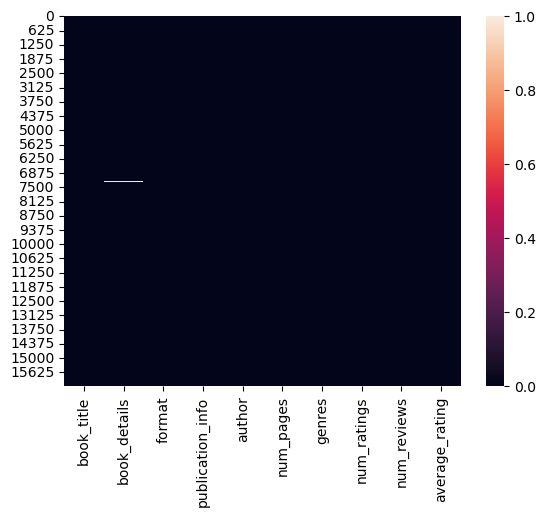

In [65]:
sns.heatmap(df1.isnull())

In [7]:
df1['book_details'].reset_index()

,index,book_details
0,0,"It is the middle of the summer, but there is a..."
1,1,Harry Potter is about to start his fifth year ...
2,2,Harry Potter has no idea how famous he is. Tha...
3,3,"Harry Potter, along with his best friends, Ron..."
4,4,It is the summer holidays and soon Harry Potte...
...,...,...
16220,16220,The 1920s. When wealthy American adolescent Ma...
16221,16221,"Set in the 1950s, The Descent asks the questio..."
16222,16222,THE HIDDEN ILLNESSES THAT SHAPED FDR’S LIFE AN...
16223,16223,"In Gateway terminology, a ""Code Yellow"" signif..."


In [66]:
per_misssing = df1.isnull().sum() *100/len(df)
per_misssing

book_title          0.00000
book_details        0.29584
format              0.00000
publication_info    0.00000
author              0.00000
num_pages           0.00000
genres              0.00000
num_ratings         0.00000
num_reviews         0.00000
average_rating      0.00000
dtype: float64

In [67]:
df1.dropna(axis = 0, inplace = True)#axis(0) - drop rows , axis(1)- drop columns

In [68]:
df1.isnull().sum()

book_title          0
book_details        0
format              0
publication_info    0
author              0
num_pages           0
genres              0
num_ratings         0
num_reviews         0
average_rating      0
dtype: int64

# Check for duplicate data

In [53]:
dup_df = df1.duplicated().any()
dup_df

True

In [54]:
df = df1.drop_duplicates()
df

,book_title,book_details,format,publication_info,author,num_pages,genres,num_ratings,num_reviews,average_rating,my_rating
0,Harry Potter and the Half-Blood Prince,"It is the middle of the summer, but there is a...","['652 pages, Paperback']","['First published July 16, 2005']",J.K. Rowling,['652'],"['Fantasy', 'Young Adult', 'Fiction', 'Magic',...",3292516,58398,4.58,Excellent
1,Harry Potter and the Order of the Phoenix,Harry Potter is about to start his fifth year ...,"['912 pages, Paperback']","['First published June 21, 2003']",J.K. Rowling,['912'],"['Young Adult', 'Fiction', 'Magic', 'Childrens...",3401709,64300,4.50,Excellent
2,Harry Potter and the Sorcerer's Stone,Harry Potter has no idea how famous he is. Tha...,"['309 pages, Hardcover']","['First published June 26, 1997']",J.K. Rowling,['309'],"['Fantasy', 'Fiction', 'Young Adult', 'Magic',...",10116247,163493,4.47,Excellent
3,Harry Potter and the Prisoner of Azkaban,"Harry Potter, along with his best friends, Ron...","['435 pages, Mass Market Paperback']","['First published July 8, 1999']",J.K. Rowling,['435'],"['Fantasy', 'Fiction', 'Young Adult', 'Magic',...",4215031,84959,4.58,Excellent
4,Harry Potter and the Goblet of Fire,It is the summer holidays and soon Harry Potte...,"['734 pages, Paperback']","['First published July 8, 2000']",J.K. Rowling,['734'],"['Fantasy', 'Young Adult', 'Fiction', 'Magic',...",3718209,69961,4.57,Excellent
...,...,...,...,...,...,...,...,...,...,...,...
16220,Finistère,The 1920s. When wealthy American adolescent Ma...,"['316 pages, Paperback']","['First published January 1, 1951']",Fritz Peters,['316'],"['Fiction', 'LGBT', 'Queer', 'Classics', 'Gay'...",129,22,3.77,Good
16221,The Descent,"Set in the 1950s, The Descent asks the questio...","['268 pages, Paperback']","['First published January 1, 1952']",Fritz Peters,['268'],['Fiction'],4,0,4.75,Excellent
16222,FDR Unmasked: 73 Years of Medical Cover-ups Th...,THE HIDDEN ILLNESSES THAT SHAPED FDR’S LIFE AN...,"['316 pages, Paperback']","['Published February 27, 2024']",Steven Lomazow,['316'],"['Drama', 'Novels', 'Contemporary']",986,11,4.32,Excellent
16223,Code Yellow in Gretna Green,"In Gateway terminology, a ""Code Yellow"" signif...","['776 pages, Kindle Edition']","['Published March 28, 2024']",Linzi Day,['776'],"['Science Fiction Fantasy', 'Fantasy', 'Fictio...",1109,106,4.61,Excellent


# Display Book-Title having Average_Ratings >=3

In [72]:

df1[df1['average_rating'] >=4]

,book_title,book_details,format,publication_info,author,num_pages,genres,num_ratings,num_reviews,average_rating
0,Harry Potter and the Half-Blood Prince,"It is the middle of the summer, but there is a...","['652 pages, Paperback']","['First published July 16, 2005']",J.K. Rowling,['652'],"['Fantasy', 'Young Adult', 'Fiction', 'Magic',...",3292516,58398,4.58
1,Harry Potter and the Order of the Phoenix,Harry Potter is about to start his fifth year ...,"['912 pages, Paperback']","['First published June 21, 2003']",J.K. Rowling,['912'],"['Young Adult', 'Fiction', 'Magic', 'Childrens...",3401709,64300,4.50
2,Harry Potter and the Sorcerer's Stone,Harry Potter has no idea how famous he is. Tha...,"['309 pages, Hardcover']","['First published June 26, 1997']",J.K. Rowling,['309'],"['Fantasy', 'Fiction', 'Young Adult', 'Magic',...",10116247,163493,4.47
3,Harry Potter and the Prisoner of Azkaban,"Harry Potter, along with his best friends, Ron...","['435 pages, Mass Market Paperback']","['First published July 8, 1999']",J.K. Rowling,['435'],"['Fantasy', 'Fiction', 'Young Adult', 'Magic',...",4215031,84959,4.58
4,Harry Potter and the Goblet of Fire,It is the summer holidays and soon Harry Potte...,"['734 pages, Paperback']","['First published July 8, 2000']",J.K. Rowling,['734'],"['Fantasy', 'Young Adult', 'Fiction', 'Magic',...",3718209,69961,4.57
...,...,...,...,...,...,...,...,...,...,...
16219,The Art of Avoiding Your Alpha,"My soulmate bought me a sugar cookie… and now,...","['221 pages, Kindle Edition']","['Published March 13, 2024']",Lola Glass,['221'],"['Science Fiction Fantasy', 'Fantasy', 'Novels...",1515,88,4.01
16221,The Descent,"Set in the 1950s, The Descent asks the questio...","['268 pages, Paperback']","['First published January 1, 1952']",Fritz Peters,['268'],['Fiction'],4,0,4.75
16222,FDR Unmasked: 73 Years of Medical Cover-ups Th...,THE HIDDEN ILLNESSES THAT SHAPED FDR’S LIFE AN...,"['316 pages, Paperback']","['Published February 27, 2024']",Steven Lomazow,['316'],"['Drama', 'Novels', 'Contemporary']",986,11,4.32
16223,Code Yellow in Gretna Green,"In Gateway terminology, a ""Code Yellow"" signif...","['776 pages, Kindle Edition']","['Published March 28, 2024']",Linzi Day,['776'],"['Science Fiction Fantasy', 'Fantasy', 'Fictio...",1109,106,4.61


In [73]:
df1[df1['average_rating'] >=3]

,book_title,book_details,format,publication_info,author,num_pages,genres,num_ratings,num_reviews,average_rating
0,Harry Potter and the Half-Blood Prince,"It is the middle of the summer, but there is a...","['652 pages, Paperback']","['First published July 16, 2005']",J.K. Rowling,['652'],"['Fantasy', 'Young Adult', 'Fiction', 'Magic',...",3292516,58398,4.58
1,Harry Potter and the Order of the Phoenix,Harry Potter is about to start his fifth year ...,"['912 pages, Paperback']","['First published June 21, 2003']",J.K. Rowling,['912'],"['Young Adult', 'Fiction', 'Magic', 'Childrens...",3401709,64300,4.50
2,Harry Potter and the Sorcerer's Stone,Harry Potter has no idea how famous he is. Tha...,"['309 pages, Hardcover']","['First published June 26, 1997']",J.K. Rowling,['309'],"['Fantasy', 'Fiction', 'Young Adult', 'Magic',...",10116247,163493,4.47
3,Harry Potter and the Prisoner of Azkaban,"Harry Potter, along with his best friends, Ron...","['435 pages, Mass Market Paperback']","['First published July 8, 1999']",J.K. Rowling,['435'],"['Fantasy', 'Fiction', 'Young Adult', 'Magic',...",4215031,84959,4.58
4,Harry Potter and the Goblet of Fire,It is the summer holidays and soon Harry Potte...,"['734 pages, Paperback']","['First published July 8, 2000']",J.K. Rowling,['734'],"['Fantasy', 'Young Adult', 'Fiction', 'Magic',...",3718209,69961,4.57
...,...,...,...,...,...,...,...,...,...,...
16220,Finistère,The 1920s. When wealthy American adolescent Ma...,"['316 pages, Paperback']","['First published January 1, 1951']",Fritz Peters,['316'],"['Fiction', 'LGBT', 'Queer', 'Classics', 'Gay'...",129,22,3.77
16221,The Descent,"Set in the 1950s, The Descent asks the questio...","['268 pages, Paperback']","['First published January 1, 1952']",Fritz Peters,['268'],['Fiction'],4,0,4.75
16222,FDR Unmasked: 73 Years of Medical Cover-ups Th...,THE HIDDEN ILLNESSES THAT SHAPED FDR’S LIFE AN...,"['316 pages, Paperback']","['Published February 27, 2024']",Steven Lomazow,['316'],"['Drama', 'Novels', 'Contemporary']",986,11,4.32
16223,Code Yellow in Gretna Green,"In Gateway terminology, a ""Code Yellow"" signif...","['776 pages, Kindle Edition']","['Published March 28, 2024']",Linzi Day,['776'],"['Science Fiction Fantasy', 'Fantasy', 'Fictio...",1109,106,4.61


In [74]:
df1[df1['average_rating'] >=3]['book_title'].reset_index()

,index,book_title
0,0,Harry Potter and the Half-Blood Prince
1,1,Harry Potter and the Order of the Phoenix
2,2,Harry Potter and the Sorcerer's Stone
3,3,Harry Potter and the Prisoner of Azkaban
4,4,Harry Potter and the Goblet of Fire
...,...,...
16036,16220,Finistère
16037,16221,The Descent
16038,16222,FDR Unmasked: 73 Years of Medical Cover-ups Th...
16039,16223,Code Yellow in Gretna Green


# Which Genre & Author has the Highest Average Rating?¶

In [41]:
df1.groupby('genres')['average_rating'].mean().sort_values().reset_index()

,genres,average_rating
0,"['Fiction', 'Young Adult', 'Fantasy']",1.140
1,"['Fantasy', 'Young Adult', 'Romance', 'Paranor...",1.290
2,"['Science Fiction', 'Fantasy', 'Novels', 'Dark...",1.530
3,"['Romance', 'Dystopia', 'Young Adult', 'Fantasy']",1.610
4,"['Historical Romance', 'Russia', 'French Revol...",1.740
...,...,...
13768,"['Fantasy', 'Romance', 'LGBT', 'Boys Love', 'F...",4.820
13769,"['History', 'Nonfiction', 'Politics', 'Germany']",4.830
13770,['Philosophy'],4.860
13771,"['Art', 'Biography', 'Memoir']",4.910


# Display top 10 highest Rated books_title & its author

In [40]:
df1.columns

Index(['book_title', 'book_details', 'format', 'publication_info', 'author',
       'num_pages', 'genres', 'num_ratings', 'num_reviews', 'average_rating'],
      dtype='object')

In [42]:
top_10_len = df1.nlargest(10, 'average_rating')[['book_title','average_rating','author']]\
.set_index('book_title')

In [43]:
top_10_len 

,average_rating,author
book_title,,
Bill Cosby: Coming at You,5.0,Sandra Ziegler
Before you're a stranger: New & selected poems,5.0,Raymond Fraser
"Born to Cheat: How Bush, Cheney, Rove & Co. Broke the Rules--From the Sandlot to the White House",5.0,Jackson Thoreau
The Shadow of the Succubus / The Eternal Thirst: Two Novels of Horror,5.0,John Condenzio
Transcendent Bread: 1976-1986,5.0,John Condenzio
The Struggle Outside,5.0,Raymond Fraser
"Kino Im Dienst Der Propaganda, Der Politik Und Des Krieges",5.0,Michele Sakkara
Dragan Radelscu & The Vampires Of Paris,5.0,Shamus Sherwood
The Ultimate Challenge Is To Live Healthy!,5.0,Felicia Martin


# Classify Books based on ratings[Excellent, Good,Average]

In [45]:
def rating(average_rating):
    if average_rating>=4.0:
        return "Excellent"
    elif average_rating>=3.0:
        return "Good"
    else:
        return "Average"

In [46]:
df1["my_rating"] = df["average_rating"].apply(rating)

In [47]:
df1

,book_title,book_details,format,publication_info,author,num_pages,genres,num_ratings,num_reviews,average_rating,my_rating
0,Harry Potter and the Half-Blood Prince,"It is the middle of the summer, but there is a...","['652 pages, Paperback']","['First published July 16, 2005']",J.K. Rowling,['652'],"['Fantasy', 'Young Adult', 'Fiction', 'Magic',...",3292516,58398,4.58,Excellent
1,Harry Potter and the Order of the Phoenix,Harry Potter is about to start his fifth year ...,"['912 pages, Paperback']","['First published June 21, 2003']",J.K. Rowling,['912'],"['Young Adult', 'Fiction', 'Magic', 'Childrens...",3401709,64300,4.50,Excellent
2,Harry Potter and the Sorcerer's Stone,Harry Potter has no idea how famous he is. Tha...,"['309 pages, Hardcover']","['First published June 26, 1997']",J.K. Rowling,['309'],"['Fantasy', 'Fiction', 'Young Adult', 'Magic',...",10116247,163493,4.47,Excellent
3,Harry Potter and the Prisoner of Azkaban,"Harry Potter, along with his best friends, Ron...","['435 pages, Mass Market Paperback']","['First published July 8, 1999']",J.K. Rowling,['435'],"['Fantasy', 'Fiction', 'Young Adult', 'Magic',...",4215031,84959,4.58,Excellent
4,Harry Potter and the Goblet of Fire,It is the summer holidays and soon Harry Potte...,"['734 pages, Paperback']","['First published July 8, 2000']",J.K. Rowling,['734'],"['Fantasy', 'Young Adult', 'Fiction', 'Magic',...",3718209,69961,4.57,Excellent
...,...,...,...,...,...,...,...,...,...,...,...
16220,Finistère,The 1920s. When wealthy American adolescent Ma...,"['316 pages, Paperback']","['First published January 1, 1951']",Fritz Peters,['316'],"['Fiction', 'LGBT', 'Queer', 'Classics', 'Gay'...",129,22,3.77,Good
16221,The Descent,"Set in the 1950s, The Descent asks the questio...","['268 pages, Paperback']","['First published January 1, 1952']",Fritz Peters,['268'],['Fiction'],4,0,4.75,Excellent
16222,FDR Unmasked: 73 Years of Medical Cover-ups Th...,THE HIDDEN ILLNESSES THAT SHAPED FDR’S LIFE AN...,"['316 pages, Paperback']","['Published February 27, 2024']",Steven Lomazow,['316'],"['Drama', 'Novels', 'Contemporary']",986,11,4.32,Excellent
16223,Code Yellow in Gretna Green,"In Gateway terminology, a ""Code Yellow"" signif...","['776 pages, Kindle Edition']","['Published March 28, 2024']",Linzi Day,['776'],"['Science Fiction Fantasy', 'Fantasy', 'Fictio...",1109,106,4.61,Excellent


In [48]:
df1.tail(10)

,book_title,book_details,format,publication_info,author,num_pages,genres,num_ratings,num_reviews,average_rating,my_rating
16215,Viciously Yours,"""I don't need a line to know what's considered...","['278 pages, Kindle Edition']","['Published January 23, 2024']",Jamie Applegate Hunter,['278'],"['Fantasy', 'Romance', 'Fae', 'Fantasy Romance...",13553,1824,3.66,Good
16216,Magical Midlife Awakening,With Kingsley safe and Momar subdued for the m...,"['364 pages, Kindle Edition']","['First published March 8, 2024']",K.F. Breene,['364'],"['Magic', 'Fantasy', 'Science Fiction Fantasy'...",5840,497,4.70,Excellent
16217,The Art of Avoiding Your Werewolf,I almost hooked up with a werewolf… but before...,"['265 pages, Kindle Edition']","['Published February 21, 2024']",Lola Glass,['265'],"['Fantasy', 'Science Fiction Fantasy', 'Specul...",2384,184,3.96,Good
16218,Heretical Fishing: A Cozy Guide to Annoying th...,"A world abandoned by the gods, mystifying cosm...","['533 pages, Kindle Edition']","['Published March 12, 2024']",Haylock Jobson,['533'],"['Fantasy', 'Science Fiction Fantasy', 'Advent...",1010,70,4.44,Excellent
16219,The Art of Avoiding Your Alpha,"My soulmate bought me a sugar cookie… and now,...","['221 pages, Kindle Edition']","['Published March 13, 2024']",Lola Glass,['221'],"['Science Fiction Fantasy', 'Fantasy', 'Novels...",1515,88,4.01,Excellent
16220,Finistère,The 1920s. When wealthy American adolescent Ma...,"['316 pages, Paperback']","['First published January 1, 1951']",Fritz Peters,['316'],"['Fiction', 'LGBT', 'Queer', 'Classics', 'Gay'...",129,22,3.77,Good
16221,The Descent,"Set in the 1950s, The Descent asks the questio...","['268 pages, Paperback']","['First published January 1, 1952']",Fritz Peters,['268'],['Fiction'],4,0,4.75,Excellent
16222,FDR Unmasked: 73 Years of Medical Cover-ups Th...,THE HIDDEN ILLNESSES THAT SHAPED FDR’S LIFE AN...,"['316 pages, Paperback']","['Published February 27, 2024']",Steven Lomazow,['316'],"['Drama', 'Novels', 'Contemporary']",986,11,4.32,Excellent
16223,Code Yellow in Gretna Green,"In Gateway terminology, a ""Code Yellow"" signif...","['776 pages, Kindle Edition']","['Published March 28, 2024']",Linzi Day,['776'],"['Science Fiction Fantasy', 'Fantasy', 'Fictio...",1109,106,4.61,Excellent
16224,Shadow's Siege,Shadow Island is under siege.Just a few short ...,"['254 pages, Kindle Edition']","['Published April 25, 2024']",Mary Stone,['254'],"['Drama', 'Novels', 'Crime', 'Thriller', 'Susp...",1271,37,4.64,Excellent


# Find unique values from Genre

In [49]:
df1['genres'].value_counts().reset_index()

,genres,count
0,[],325
1,['Fiction'],40
2,['Poetry'],26
3,['Fantasy'],21
4,"['Mystery', 'Fiction', 'Crime', 'Classics', 'M...",17
...,...,...
13768,"['Mystery', 'Young Adult', 'Historical Fiction...",1
13769,"['Romance', 'Gothic', 'Mystery', 'Historical F...",1
13770,"['Fiction', 'Africa', 'South Africa', 'Contemp...",1
13771,"['Fiction', 'Historical Fiction', 'Mystery', '...",1


In [34]:
list = []
for value in df['genres']:
    list.append(value.split(','))
    

In [37]:
list

[["['Fantasy'",
  " 'Young Adult'",
  " 'Fiction'",
  " 'Magic'",
  " 'Childrens'",
  " 'Audiobook'",
  " 'Adventure']"],
 ["['Young Adult'",
  " 'Fiction'",
  " 'Magic'",
  " 'Childrens'",
  " 'Audiobook'",
  " 'Adventure'",
  " 'Middle Grade']"],
 ["['Fantasy'",
  " 'Fiction'",
  " 'Young Adult'",
  " 'Magic'",
  " 'Childrens'",
  " 'Middle Grade'",
  " 'Audiobook']"],
 ["['Fantasy'",
  " 'Fiction'",
  " 'Young Adult'",
  " 'Magic'",
  " 'Childrens'",
  " 'Middle Grade'",
  " 'Audiobook']"],
 ["['Fantasy'",
  " 'Young Adult'",
  " 'Fiction'",
  " 'Magic'",
  " 'Childrens'",
  " 'Audiobook'",
  " 'Middle Grade']"],
 ["['Fantasy'",
  " 'Young Adult'",
  " 'Fiction'",
  " 'Magic'",
  " 'Adventure'",
  " 'Supernatural'",
  " 'Childrens']"],
 ["['Fantasy'",
  " 'Fiction'",
  " 'Young Adult'",
  " 'Magic'",
  " 'Childrens'",
  " 'Classics'",
  " 'Adventure']"],
 ["['Science Fiction'",
  " 'Fiction'",
  " 'Humor'",
  " 'Fantasy'",
  " 'Comedy'",
  " 'Audiobook'",
  " 'Science Fiction Fantas

In [39]:
one_d = []
for item in list:
    for item1 in item:
        one_d.append(item1)

In [42]:
one_d

["['Fantasy'",
 " 'Young Adult'",
 " 'Fiction'",
 " 'Magic'",
 " 'Childrens'",
 " 'Audiobook'",
 " 'Adventure']",
 "['Young Adult'",
 " 'Fiction'",
 " 'Magic'",
 " 'Childrens'",
 " 'Audiobook'",
 " 'Adventure'",
 " 'Middle Grade']",
 "['Fantasy'",
 " 'Fiction'",
 " 'Young Adult'",
 " 'Magic'",
 " 'Childrens'",
 " 'Middle Grade'",
 " 'Audiobook']",
 "['Fantasy'",
 " 'Fiction'",
 " 'Young Adult'",
 " 'Magic'",
 " 'Childrens'",
 " 'Middle Grade'",
 " 'Audiobook']",
 "['Fantasy'",
 " 'Young Adult'",
 " 'Fiction'",
 " 'Magic'",
 " 'Childrens'",
 " 'Audiobook'",
 " 'Middle Grade']",
 "['Fantasy'",
 " 'Young Adult'",
 " 'Fiction'",
 " 'Magic'",
 " 'Adventure'",
 " 'Supernatural'",
 " 'Childrens']",
 "['Fantasy'",
 " 'Fiction'",
 " 'Young Adult'",
 " 'Magic'",
 " 'Childrens'",
 " 'Classics'",
 " 'Adventure']",
 "['Science Fiction'",
 " 'Fiction'",
 " 'Humor'",
 " 'Fantasy'",
 " 'Comedy'",
 " 'Audiobook'",
 " 'Science Fiction Fantasy']",
 "['Science Fiction'",
 " 'Fiction'",
 " 'Humor'",
 " 'Fa

In [44]:
uni_list = []
for item in one_d:
    if item not in uni_list:
        uni_list.append(item)

In [47]:
len(uni_list)

1525

# How many books of each genre were written

In [48]:
one_d = []
for item in list:
    for item1 in item:
        one_d.append(item1)

In [49]:
from collections import Counter

In [50]:
Counter(one_d)

Counter({" 'Fiction'": 7764,
         "['Fiction'": 3133,
         " 'Romance'": 2794,
         " 'Fantasy'": 2607,
         " 'Classics'": 2433,
         " 'Young Adult'": 2418,
         " 'Contemporary'": 2219,
         "['Fantasy'": 2211,
         " 'Historical Fiction'": 1779,
         " 'Nonfiction'": 1656,
         " 'Mystery'": 1655,
         " 'Literature'": 1585,
         " 'Novels'": 1497,
         " 'Historical'": 1413,
         " 'Thriller'": 1381,
         " 'Audiobook'": 1317,
         " 'Paranormal'": 1215,
         " 'Adventure'": 1101,
         " 'Crime'": 1012,
         " 'Science Fiction'": 1010,
         "['Nonfiction'": 1009,
         " 'Childrens'": 925,
         "['Young Adult'": 891,
         " 'Biography'": 839,
         " 'Mystery Thriller'": 829,
         " 'Humor'": 788,
         "['Historical Fiction'": 784,
         "['Romance'": 762,
         " 'Middle Grade'": 741,
         "['Mystery'": 730,
         " 'Science Fiction Fantasy'": 725,
         " 'Adult'

# Pictorial Representation of Frequent words in a dataset

In [75]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import seaborn as sns

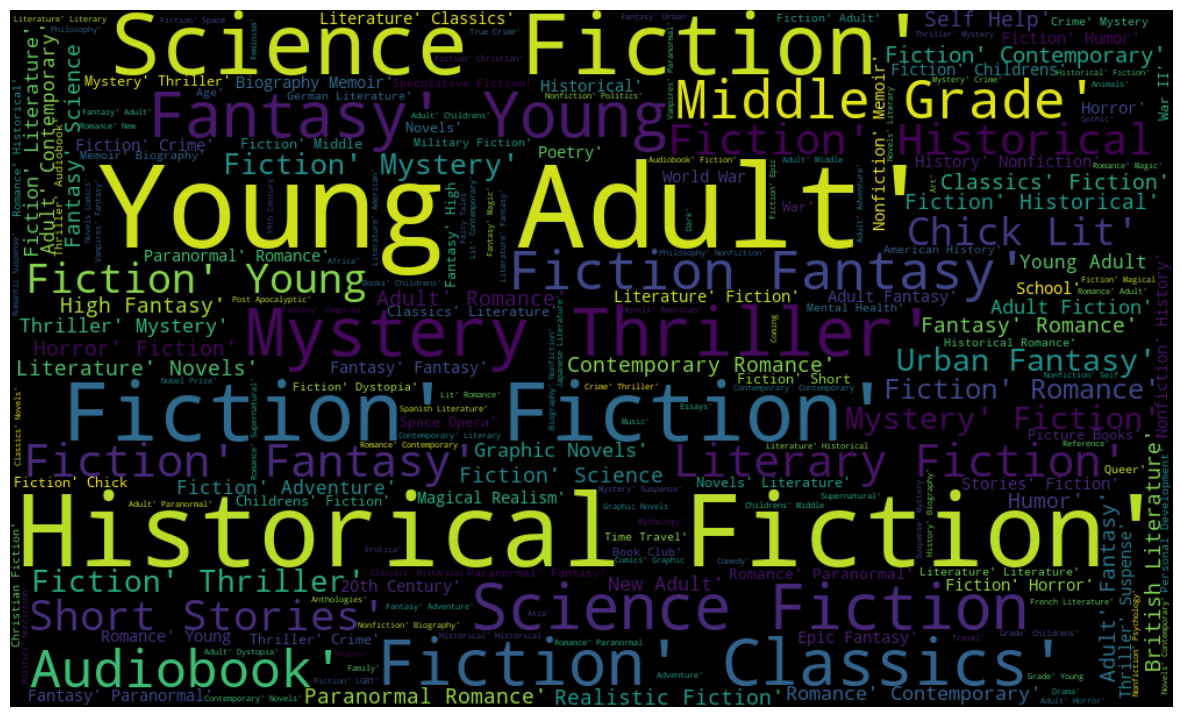

In [76]:
reviews = ' '.join(df1['genres'])
wordcloud = WordCloud(height = 600, width = 1000, max_font_size = 100, background_color='black').generate(reviews)
plt.figure(figsize = (15,12))
plt.imshow(wordcloud.generate(reviews), interpolation='bilinear')
plt.axis('off')
plt.show()


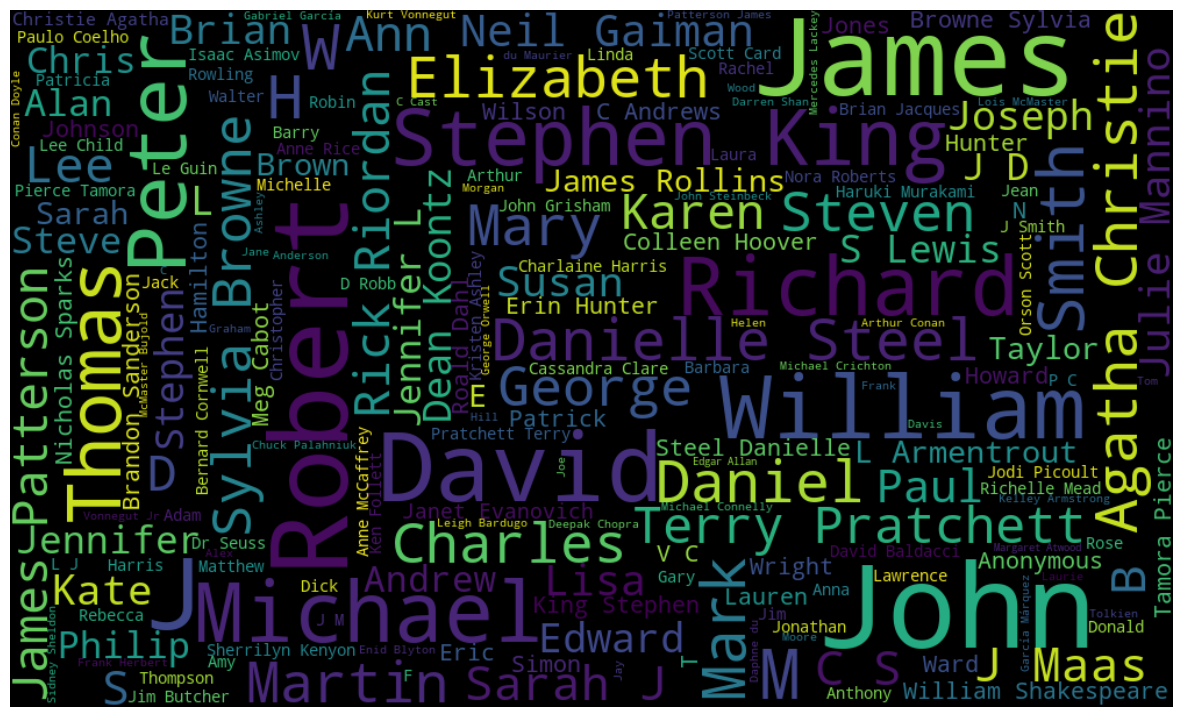

In [77]:
reviews = ' '.join(df1['author'])
wordcloud = WordCloud(height = 600, width = 1000, max_font_size = 100, background_color='black').generate(reviews)
plt.figure(figsize = (15,12))
plt.imshow(wordcloud.generate(reviews), interpolation='bilinear')
plt.axis('off')
plt.show()
